In [2]:
# %load imports.py
import sys
import numpy as np
import cPickle as pickle
%matplotlib inline
import matplotlib.pyplot as plt

current_dir = %pwd
sys.path.append('/'.join([current_dir, '..', 'src']))

In [3]:
from util.image_processing import as_RGB
from util.ALEFeatures import BasicALEFeatures

In [6]:
#load space invaders frames
with open(current_dir+'/../data/space_invaders/frames.pkl','rb') as f:
    frames = pickle.load(f) 

#take a single example frame
frame = frames[25,:].reshape((210,160))

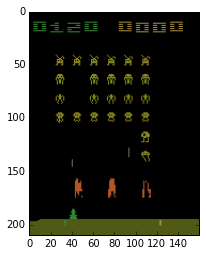

In [13]:
#show the frame
plt.imshow(as_RGB(frames[36,:].reshape((210,160))))

** Color Detection **

Since game objects in space invaders have a single color, 
we can perform simple color detection to find their location in the image
(this is the idea behind the basic features).

For space invaders some interesting color codes are:
- 4 (lasers)
- 20 (enemies)
- 52 (shields)
- 196 (space ship + some other stuff)

(see the Game Colors notebook to see how these were detected)

Color detection can be done by simply comparing the frame with
the color code, i.e. (frame == color_id).
This results in a binary image frame with 1 only for pixels
that have the given color.

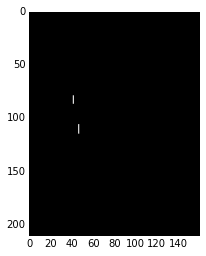

In [31]:
#detect lasers
plt.imshow(frame==4,cmap=plt.get_cmap('gray'))

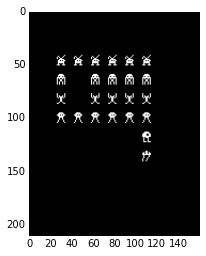

In [15]:
#detect enemies
plt.imshow(frame==20,cmap=plt.get_cmap('gray'))

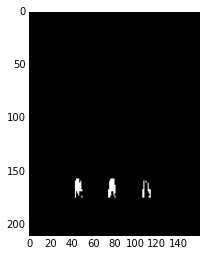

In [32]:
#detect shields
plt.imshow(frame==52,cmap=plt.get_cmap('gray'))

Several game objects (the score and part of the ground) 
have the same color as the player space ship.
This is easy to solve, however, as the ship moves in a fixed
horizontal band.

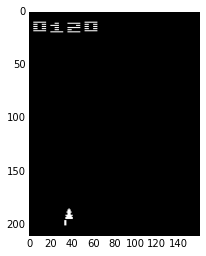

In [33]:
#detect player space ship
plt.imshow(frame==196,cmap=plt.get_cmap('gray'))

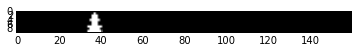

In [21]:
#the ship only moves horizontally, so we can easily cut to the relevant part of the image
plt.imshow(frame[184:194,:]==196,cmap=plt.get_cmap('gray'))

** Extract Info **

In [38]:
# Gets the columns in the image (pixel x-coords) that contain the player ship. 
# Returns left and right boundaries as pair (leftmost,rightmost)
# Vertical ship position is always in [184,194]

def space_ship_position(frame):
    return (
        np.min(np.where(frame[184:194,:]==196)[1]),
        np.max(np.where(frame[184:194,:]==196)[1]) )

space_ship_position(frame)

(34, 40)

In [127]:
#check how low enemies have gotten (game over if they get to ground level)
def lowest_enemy(frame):
    return np.max(np.where(frame==20)[0]) #max:lower screen has higher row index

lowest_enemy(frame)

140

In [119]:
#checks if the player ship is below a laser
def below_laser(frame):
    c1,c2 = space_ship_position(frame)
    return np.any(
        frame[:,c1:c2+1] == 4 #+1, upper boundary is exclusive
    )

below_laser(frame)

False

In [120]:
#checks if the player ship is below an enemy
def below_enemy(frame):
    c1,c2 = space_ship_position(frame)
    return np.any(
        frame[:,c1:c2+1] == 20
    )


below_enemy(frame)

False

In [133]:
#enemies on the screen
#Note: this is an estimate. We count enemy pixels and divide by the average amount of pixels per enemy
def num_enemies(frame):
    return np.sum(frame == 20)//37 #on average each enemy consists of 37 pixels

num_enemies(frame)

24

In [121]:
#check if space ship is below shield
#Note: to check if player is protected, we need
#to check if all columns above the ship contain
#a shield pixel (not just if ship and shield overlap)

def below_shield(frame):
    c1,c2 = space_ship_position(frame)
    return np.all( #test if all columns contain shield
                np.any(frame[:,c1:c2+1] == 52,
                 axis=0) ) #add axis argument to check per column

print below_shield(frame)

False


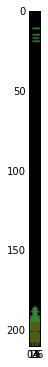

In [124]:
#check actual frame: no enemies, shields or lasers above ship
c1,c2 = space_ship_position(frame)
f=plt.figure(figsize=(6,6))
plt.gca().imshow(as_RGB(frame[:,c1:c2+1]))

position:
38 44
below enemy:
True
below laser:
True
below shield:
False
partially below shield:
True


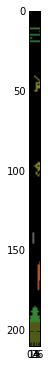

In [123]:
#try on different frame: this one is below enemy and laser, but not shield
c1,c2 = space_ship_position(frames[36,:].reshape((210,160)))
print 'position:'
print c1,c2
print 'below enemy:'
print below_enemy(frames[36,:].reshape((210,160)))
print 'below laser:'
print below_laser(frames[36,:].reshape((210,160)))
print 'below shield:'
print below_shield(frames[36,:].reshape((210,160)))

#if we just check overlap with shield in stead of protection (1 pixel overlap):
print 'partially below shield:'
print np.any(frame[:,c1:c2+1] == 52)


f=plt.figure(figsize=(6,6))
plt.gca().imshow(as_RGB(frames[36,:].reshape((210,160))[:,c1:c2+1]))